In [1]:
import pandas as pd
import numpy as np
import pybaseball as pyb
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, atan2, degrees, pi
from scipy.stats import percentileofscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
fg_pitchers_2023 = pd.read_csv('/Users/michaelrosen/Desktop/Sports/Baseball/Fantasy_2024/fg_pitchers_by_FA%_2023.csv')

In [3]:
loc_grades_2023 = pd.read_excel('/Users/michaelrosen/Desktop/Sports/Baseball/Fantasy_2024/bot_CMD_and_loc_plus_2023.xlsx')

In [4]:
pitchers_2023 = fg_pitchers_2023.merge(loc_grades_2023, on='MLBAMID')

In [5]:
pitchers_2023 = pitchers_2023[pitchers_2023['FA%'] >= 0.25]

In [6]:
fg_pitchers_2024 = pd.read_excel('/Users/michaelrosen/Desktop/Sports/Baseball/Fantasy_2024/fg_pitchers_FA%_2024.xlsx')

In [7]:
loc_grades_2024 = pd.read_excel('/Users/michaelrosen/Desktop/Sports/Baseball/Fantasy_2024/bot_CMD_loc_plus_2024.xlsx')

In [8]:
pitchers_2024 = fg_pitchers_2024.merge(loc_grades_2024, on='MLBAMID')

In [9]:
mega_merge = pitchers_2023.merge(pitchers_2024, on='MLBAMID')

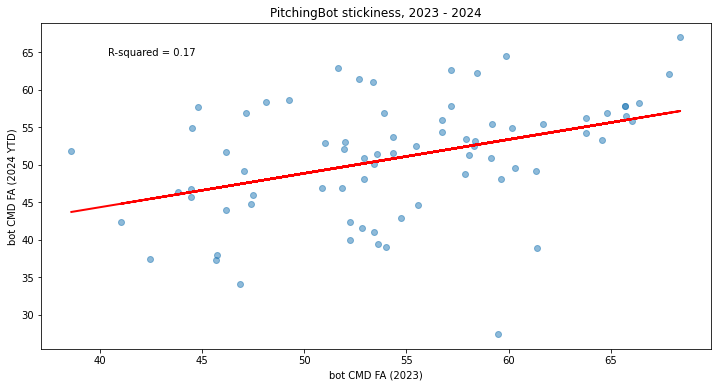

In [11]:
x = mega_merge['botCmd FA_x']
y = mega_merge['botCmd FA_y']

model = LinearRegression().fit(x.values.reshape(-1, 1), y)

r_squared = model.score(x.values.reshape(-1, 1), y)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red', linewidth=2)
plt.xlabel('bot CMD FA (2023)')
plt.ylabel('bot CMD FA (2024 YTD)')
plt.title('PitchingBot stickiness, 2023 - 2024')
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)
plt.show()


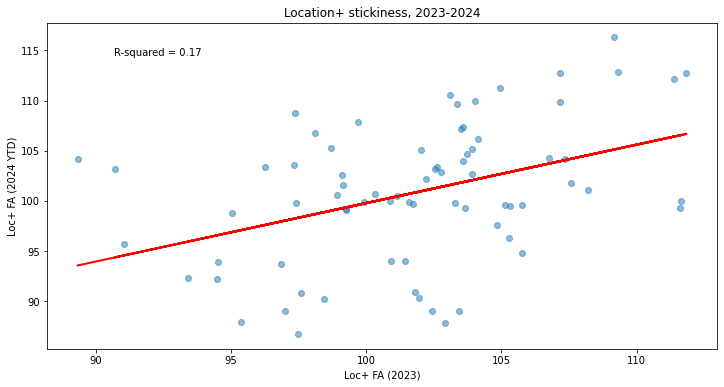

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'weighted_tightness_metric_x' and 'weighted_tightness_metric_y' are columns in 'tightness_metric_reliability'
x = mega_merge['Loc+ FA_x']
y = mega_merge['Loc+ FA_y']

# Fit a linear regression model
model = LinearRegression().fit(x.values.reshape(-1, 1), y)

# Get the R-squared value
r_squared = model.score(x.values.reshape(-1, 1), y)

# Plot the scatter plot and best-fit line
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red', linewidth=2)
plt.xlabel('Loc+ FA (2023)')
plt.ylabel('Loc+ FA (2024 YTD)')
plt.title('Location+ stickiness, 2023-2024')
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)
plt.show()


In [13]:
kirby_index_2023 = pd.read_excel('/Users/michaelrosen/Desktop/Sports/Baseball/Fantasy_2024/kirby_index_2023.xlsx')

In [14]:
fg_vs_kirby = mega_merge.merge(kirby_index_2023,left_on='MLBAMID',right_on='pitcher')

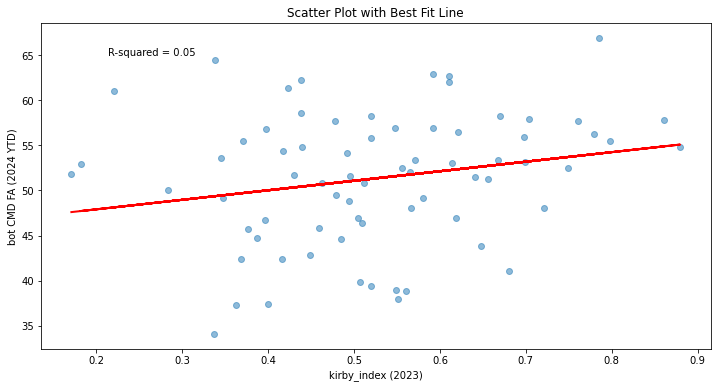

In [15]:
x = fg_vs_kirby['kirby_index']
y = fg_vs_kirby['botCmd FA_y']

model = LinearRegression().fit(x.values.reshape(-1, 1), y)

r_squared = model.score(x.values.reshape(-1, 1), y)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red', linewidth=2)
plt.xlabel('kirby_index (2023)')
plt.ylabel('bot CMD FA (2024 YTD)')
plt.title('Scatter Plot with Best Fit Line')
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)
plt.show()


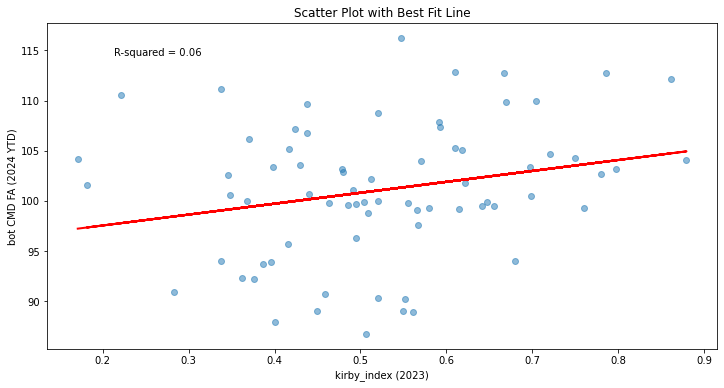

In [16]:
x = fg_vs_kirby['kirby_index']
y = fg_vs_kirby['Loc+ FA_y']

model = LinearRegression().fit(x.values.reshape(-1, 1), y)

r_squared = model.score(x.values.reshape(-1, 1), y)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, model.predict(x.values.reshape(-1, 1)), color='red', linewidth=2)
plt.xlabel('kirby_index (2023)')
plt.ylabel('bot CMD FA (2024 YTD)')
plt.title('Scatter Plot with Best Fit Line')
plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)
plt.show()
